In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import seaborn as sns
import os,sys
import helper_scripts as hs
from helper_scripts import effect_plot as EP

import yaml

Populating the interactive namespace from numpy and matplotlib


/Users/silas/miniconda3/lib/python3.6/site-packages/scikit_bio-0.5.5-py3.6-macosx-10.7-x86_64.egg/skbio/util/_testing.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as pdt


In [2]:
%run warm_figure_scripts.py

# barplot

In [3]:
SAVEPLOT=False
output_folder="../Figures"

plt_params=dict(figurefolder=output_folder,
    formats=['.svg'],
    SAVEPLOT=SAVEPLOT)               ### SAVEPLOT


In [5]:
Stats1= pd.read_table("../data/Sequencing_C/Analysis/Analysis/Comparisons/cobined_stats_aldex.tsv",index_col=0,header=[0,1])


In [6]:
Stats1= pd.read_table("../data/Sequencing_C/Analysis/Analysis/Comparisons/cobined_stats_aldex.tsv",index_col=0,header=[0,1])
Stats2= pd.read_table("../data/Sequencing_B/Analysis_warm/Analysis_feces/Comparisons/cobined_stats_aldex.tsv",index_col=0,header=[0,1])
Stats=pd.concat((Stats1,Stats2),axis=1,sort=False)

Stats= Stats.rename(Labels)



Stats=Stats.loc[~Stats.index.isnull()]
Stats=Stats.loc[~Stats.index.str.contains('Eukaryota')]

del Stats1,Stats2

In [7]:
Stats=Stats.loc[:,(['we.eBH', 'we.ep', 'wi.eBH', 'wi.ep','diff.btw', 'effect', 'rab.all'],['Temp', 'TempSH','TempOVA'])]
Stats= Stats.rename(columns={'Temp':'♂','TempOVA':'ova','TempSH':'sham'},level=1)
Stats.sort_index(axis=1,inplace=True)


0.5639097744360902

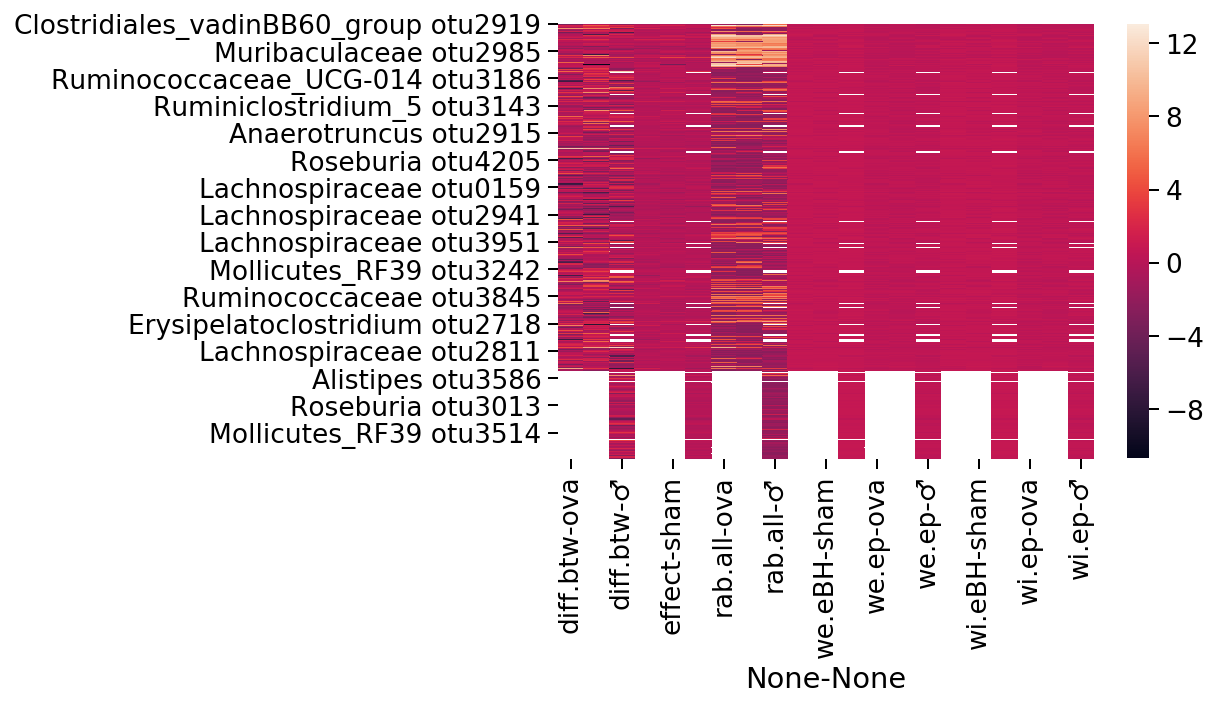

In [8]:

sns.heatmap(Stats)
Stats.isnull().any(1).sum()/Stats.shape[0]

In [9]:
sig= (Stats['we.ep']<0.05).all(1)&((Stats['effect']>0).all(1)|(Stats['effect']<0).all(1))

print(f"{sum(sig)}")

5


In [10]:
Stats[sig]

diff.btw                         effect  \
                                          ova      sham          ♂       ova   
Muribaculaceae otu2618               2.421589  5.200471   3.348305  1.261485   
Muribaculaceae otu2594               2.044091  4.772136   3.880957  1.198897   
Lachnospiraceae otu2806              9.679810  8.255582   8.585285  1.413486   
Lactobacillus otu2644                1.154192  2.021661   2.837629  0.953344   
Clostridium_sensu_stricto_1 otu2703  4.127472  8.782257  11.545373  0.992670   

                                                           rab.all             \
                                         sham         ♂        ova       sham   
Muribaculaceae otu2618               3.264398  1.681557  10.558619   8.628880   
Muribaculaceae otu2594               3.739054  2.911560  12.086673  10.070047   
Lachnospiraceae otu2806              1.080079  1.307144   6.247567   5.856885   
Lactobacillus otu2644                1.219128  1.671006   7.113668   6.676164   
Clostridium_sensu_stricto_1 otu2703  1.207272  2.676614   9.206316   4.451019   

                                                 we.eBH  ...            \
                                            ♂       ova  ...         ♂   
Muribaculaceae otu2618               9.062253  0.112621  ...  0.288355   
Muribaculaceae otu2594               9.557834  0.124621  ...  0.001932   
Lachnospiraceae otu2806             -0.585976  0.145068  ...  0.177357   
Lactobacillus otu2644                8.611463  0.350603  ...  0.054064   
Clostridium_sensu_stricto_1 otu2703  1.358338  0.256732  ...  0.004387   

                                        we.ep                          \
                                          ova          sham         ♂   
Muribaculaceae otu2618               0.002614  2.318092e-03  0.014655   
Muribaculaceae otu2594               0.003622  1.812714e-08  0.000006   
Lachnospiraceae otu2806              0.005316  1.810307e-02  0.006925   
Lactobacillus otu2644                0.046620  4.675015e-03  0.000471   
Clostridium_sensu_stricto_1 otu2703  0.021274  6.713702e-03  0.000029   

                                       wi.eBH                         wi.ep  \
                                          ova      sham         ♂       ova   
Muribaculaceae otu2618               0.067454  0.010265  0.049626  0.001790   
Muribaculaceae otu2594               0.115377  0.010265  0.031175  0.005548   
Lachnospiraceae otu2806              0.163501  0.121450  0.197273  0.010412   
Lactobacillus otu2644                0.260361  0.080044  0.076429  0.027475   
Clostridium_sensu_stricto_1 otu2703  0.050823  0.068089  0.032100  0.000920   

                                                         
                                         sham         ♂  
Muribaculaceae otu2618               0.000155  0.000432  
Muribaculaceae otu2594               0.000155  0.000155  
Lachnospiraceae otu2806              0.011008  0.011955  
Lactobacillus otu2644                0.005076  0.000999  
Clostridium_sensu_stricto_1 otu2703  0.004043  0.000180  

[5 rows x 21 columns]

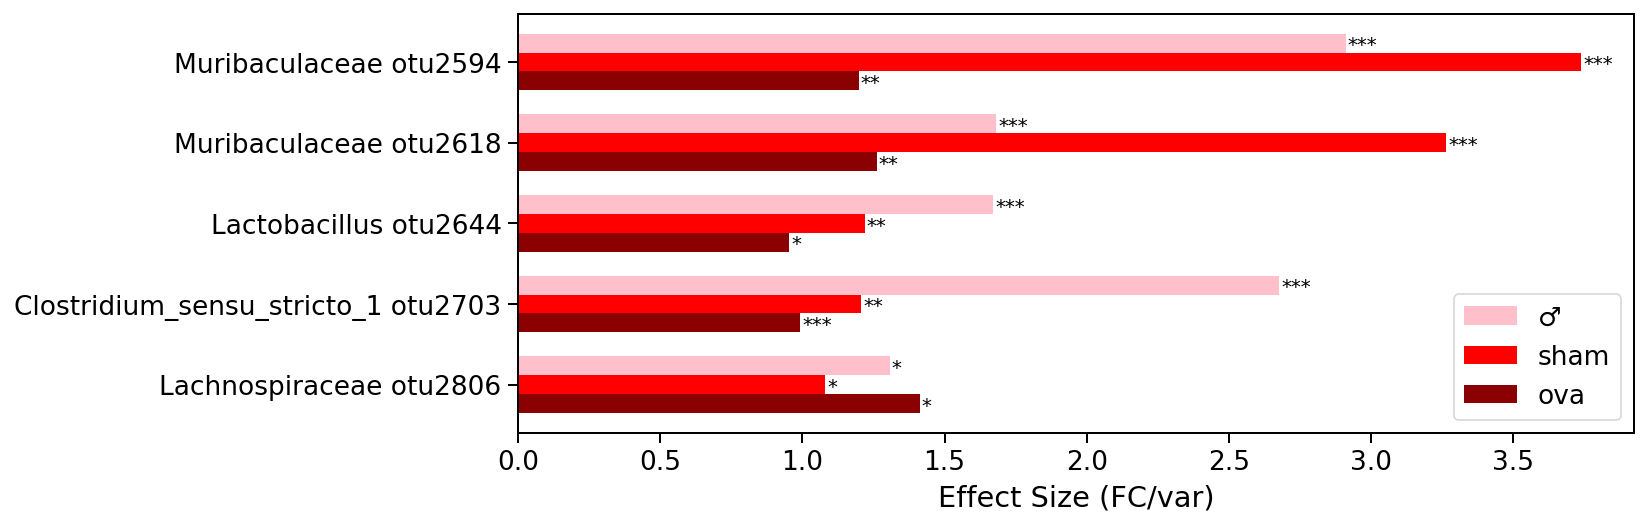

In [12]:


sig = Stats.loc[sig,'effect'].sort_values('sham',ascending=False).index
hs.plotting.plotting_Setup()

ax= EP.effect_plot(Stats.loc[sig,'effect'], 
               Stats['wi.ep'],
               colors=['darkred','red','pink'])


ax.set_xlabel('Effect Size (FC/var)')


hs.plotting.saveplot('Barplot_sig_all',**plt_params)
if SAVEPLOT:
    os.makedirs('results')
    Stats.to_excel('../results/stats_combined.xlsx')